In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder

%matplotlib inline

In [2]:
! conda install tensorflow
! conda install keras

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



# Personalized Fashion Recommendations
## Gen Info Features relevant for CNN

In [3]:
df_articles = pd.read_csv("articles.csv.zip")

In [4]:
categories_to_have = \
['Garment Upper body', 'Garment Lower body', 'Garment Full body', 'Accessories', 'Underwear',\
 'Shoes', 'Swimwear', 'Socks & Tights', 'Nightwear']

In [5]:
df_articles_filtered = df_articles[df_articles['product_group_name'].isin(categories_to_have)]

In [6]:
df_articles_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105244 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105244 non-null  int64 
 1   product_code                  105244 non-null  int64 
 2   prod_name                     105244 non-null  object
 3   product_type_no               105244 non-null  int64 
 4   product_type_name             105244 non-null  object
 5   product_group_name            105244 non-null  object
 6   graphical_appearance_no       105244 non-null  int64 
 7   graphical_appearance_name     105244 non-null  object
 8   colour_group_code             105244 non-null  int64 
 9   colour_group_name             105244 non-null  object
 10  perceived_colour_value_id     105244 non-null  int64 
 11  perceived_colour_value_name   105244 non-null  object
 12  perceived_colour_master_id    105244 non-null  int64 
 13 

In [8]:
df_articles_filtered.isna().sum().sort_values(ascending=False)

detail_desc                     416
perceived_colour_master_name      0
garment_group_name                0
garment_group_no                  0
section_name                      0
section_no                        0
index_group_name                  0
index_group_no                    0
index_name                        0
index_code                        0
department_name                   0
department_no                     0
article_id                        0
product_code                      0
perceived_colour_value_name       0
perceived_colour_value_id         0
colour_group_name                 0
colour_group_code                 0
graphical_appearance_name         0
graphical_appearance_no           0
product_group_name                0
product_type_name                 0
product_type_no                   0
prod_name                         0
perceived_colour_master_id        0
dtype: int64

In [9]:
df_articles_filtered.shape

(105244, 25)

In [13]:
df_articles_filtered.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## Product Group Name

In [11]:
grouped = df_articles_filtered['product_group_name'].value_counts()
colors = sns.color_palette('pastel')

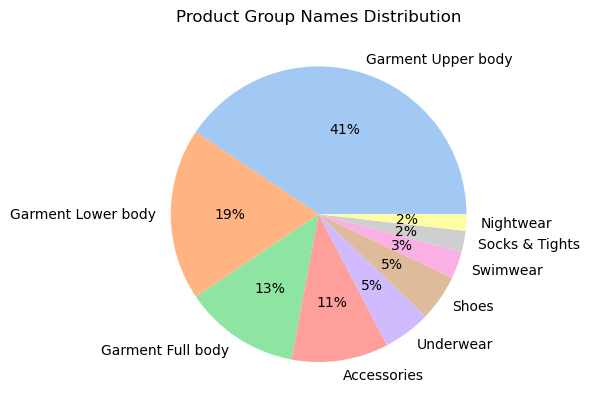

In [12]:
plt.pie(grouped.values, labels = grouped.index, colors = colors, autopct='%.0f%%')
plt.title("Product Group Names Distribution")
plt.show()

## Colors

In [17]:
df_articles_filtered['colour_group_name'].nunique()

50

In [16]:
df_articles_filtered['colour_group_name'].value_counts()

Black              22585
Dark Blue          12148
White               9497
Light Pink          5788
Grey                4477
Light Beige         3345
Blue                3299
Red                 3052
Light Blue          3007
Greenish Khaki      2766
Dark Grey           2728
Off White           2724
Beige               2705
Dark Red            2340
Dark Green          2103
Light Grey          2101
Pink                2053
Yellow              1644
Light Orange        1516
Yellowish Brown     1460
Gold                1377
Dark Beige          1082
Light Turquoise     1023
Light Yellow         983
Dark Orange          886
Dark Pink            817
Green                814
Orange               778
Other Pink           737
Silver               707
Light Green          678
Dark Yellow          574
Light Purple         550
Dark Turquoise       473
Turquoise            435
Dark Purple          314
Light Red            284
Greyish Beige        226
Other Yellow         224
Purple               181


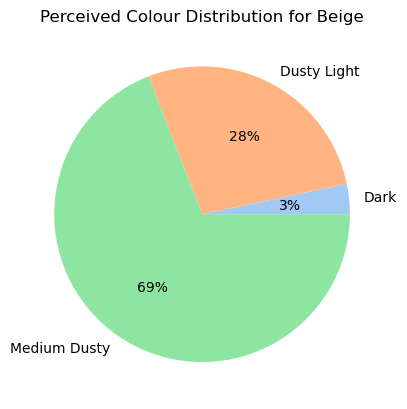

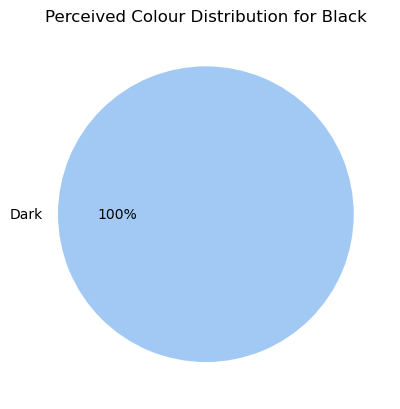

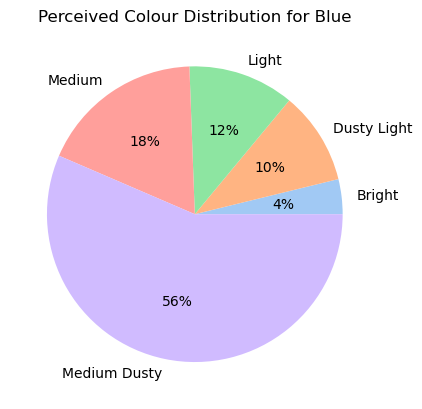

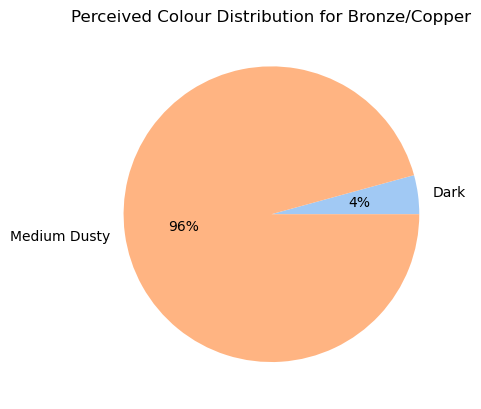

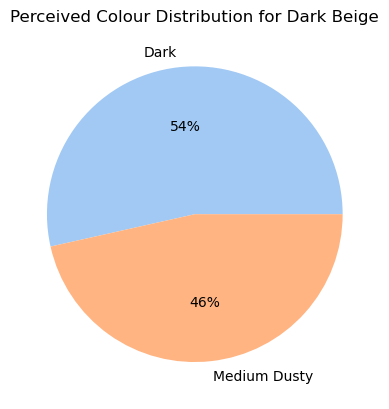

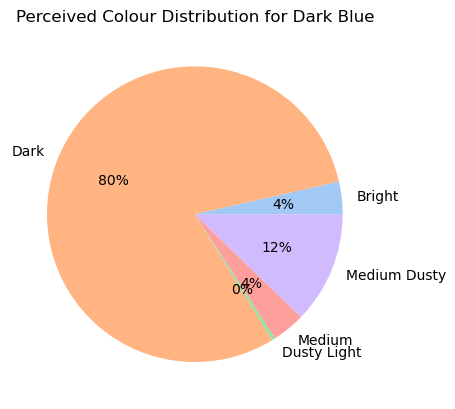

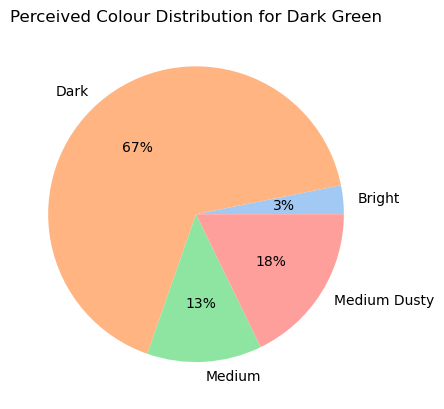

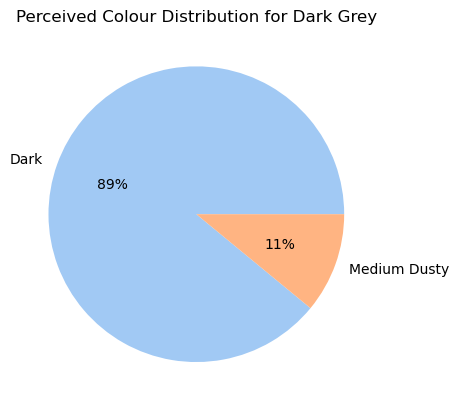

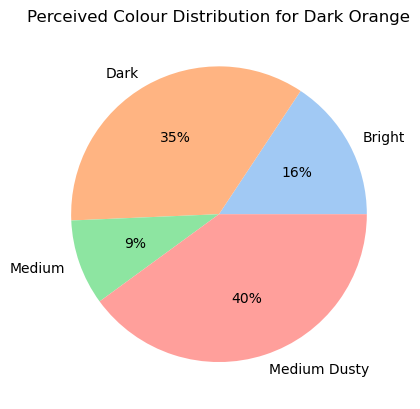

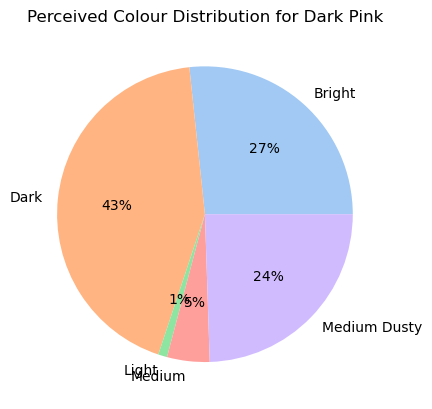

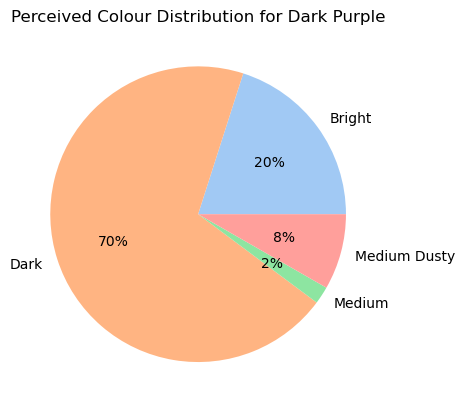

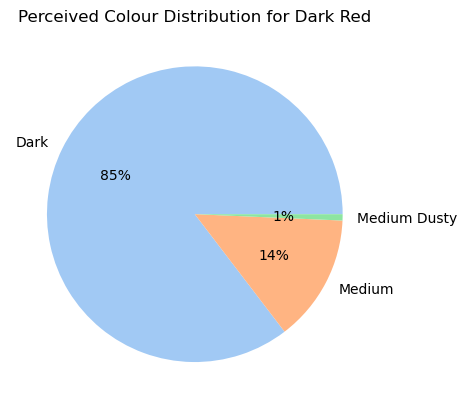

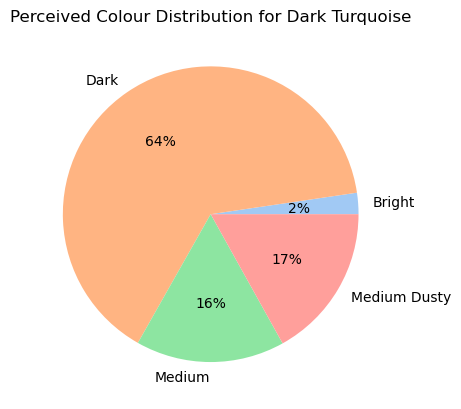

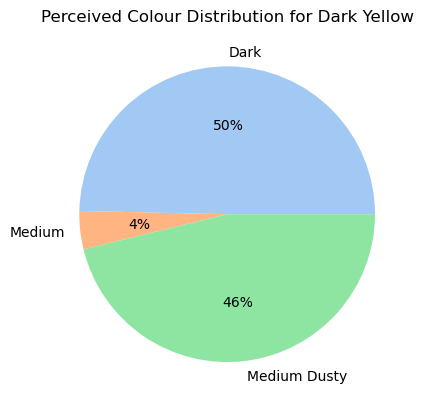

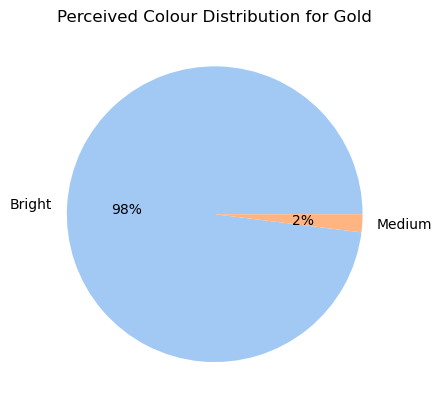

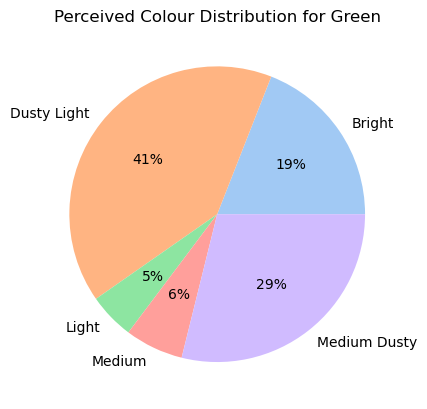

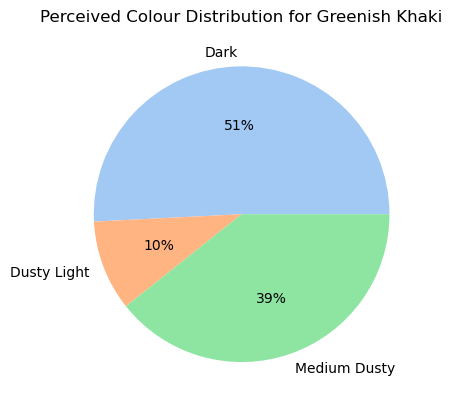

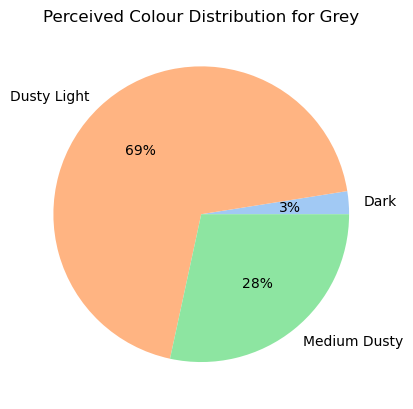

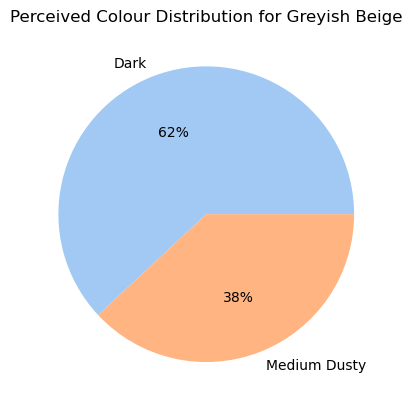

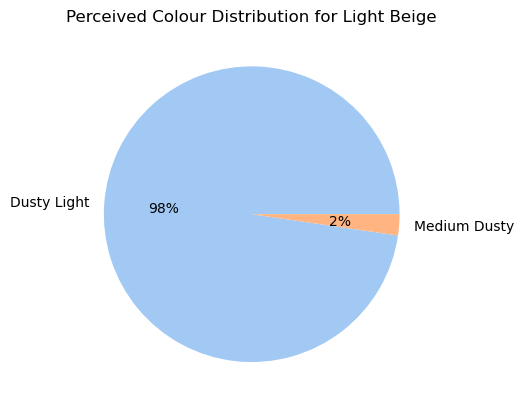

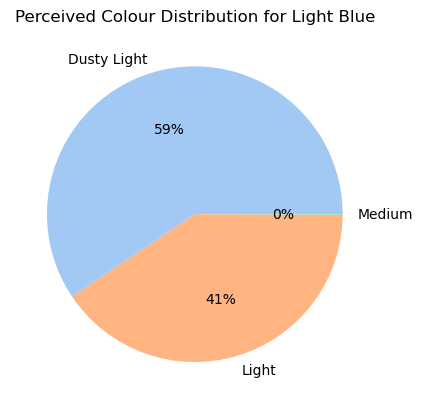

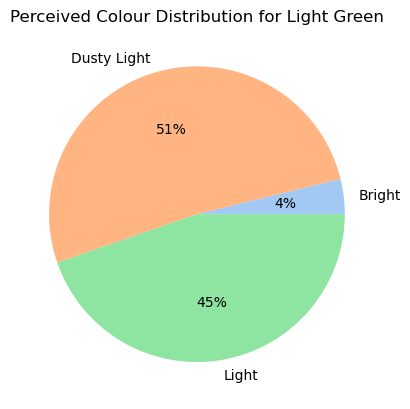

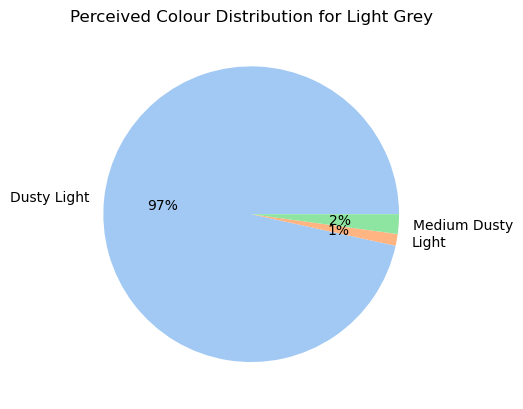

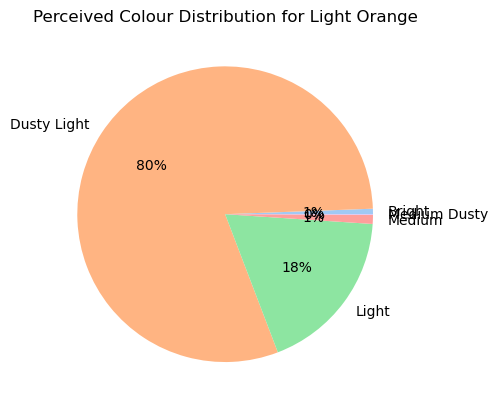

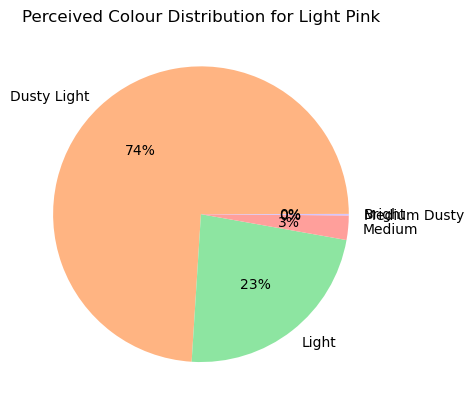

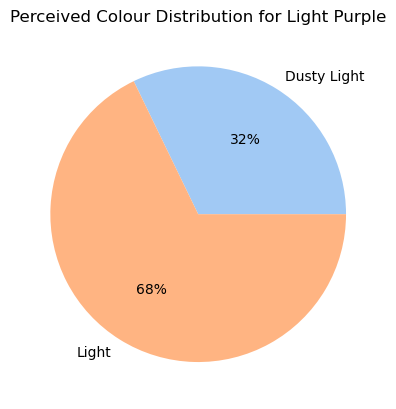

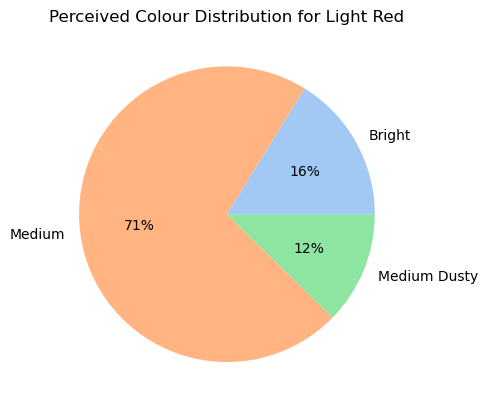

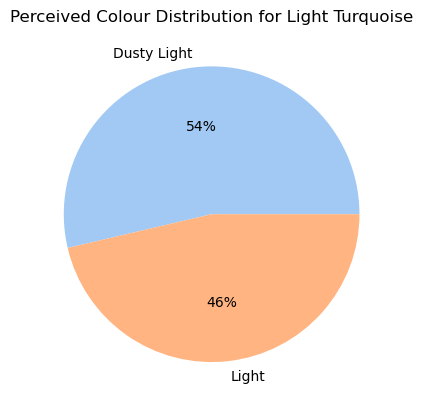

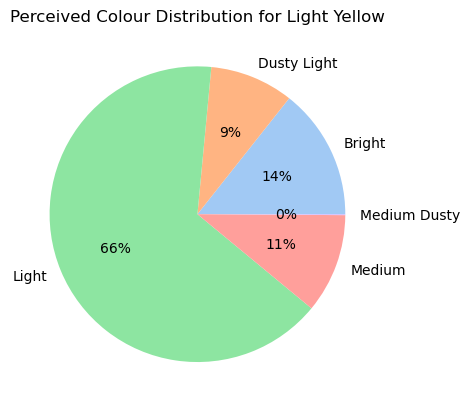

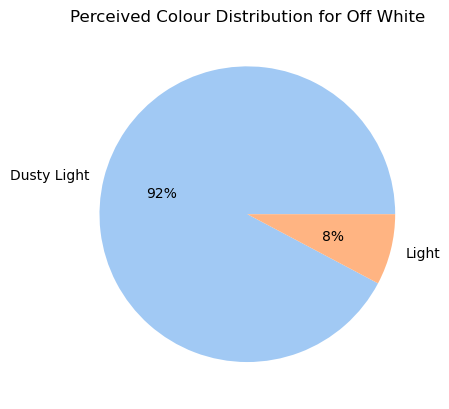

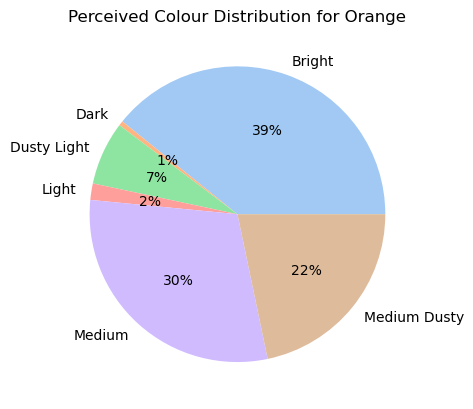

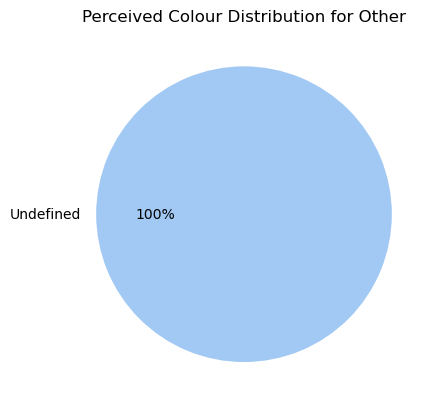

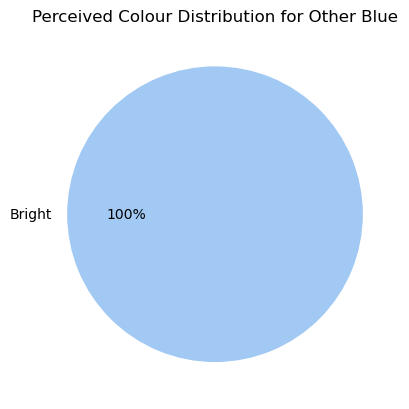

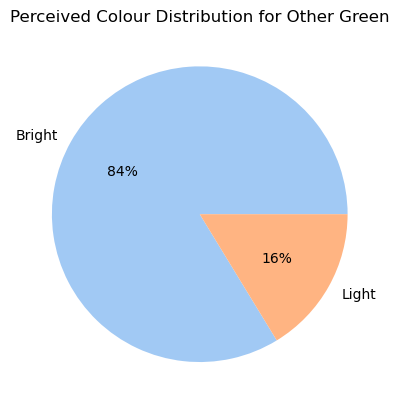

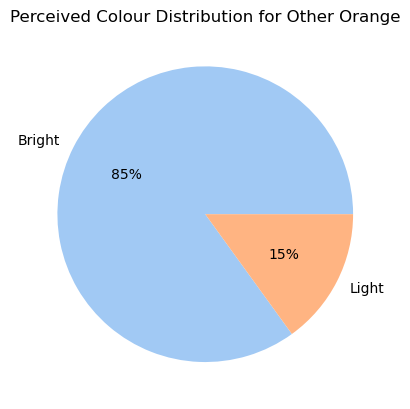

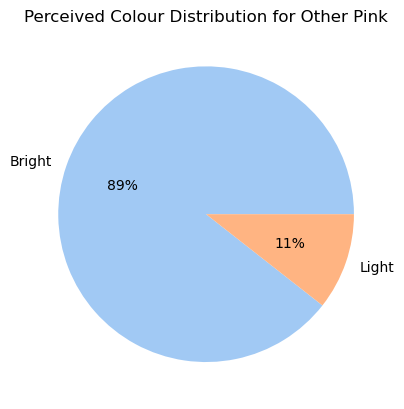

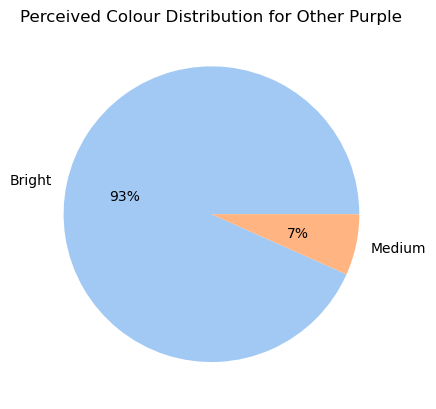

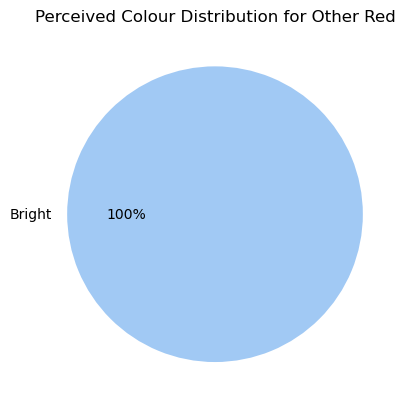

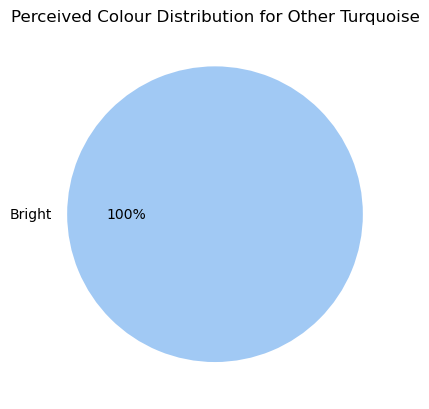

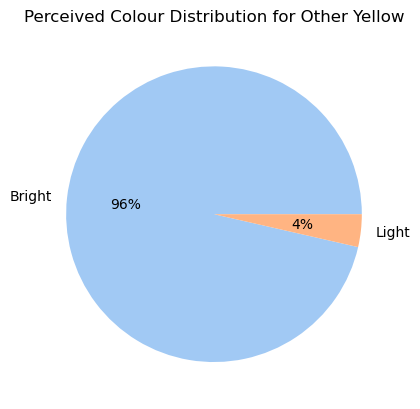

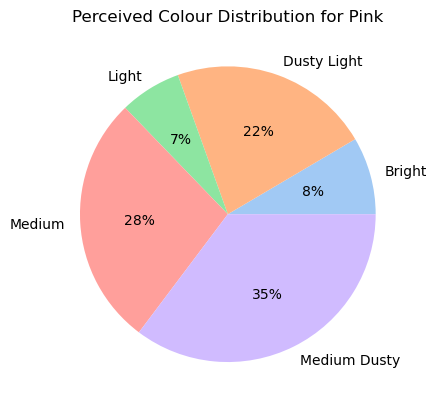

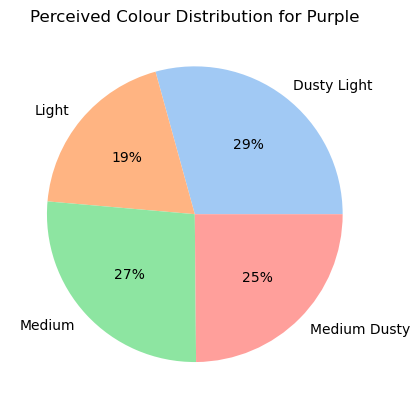

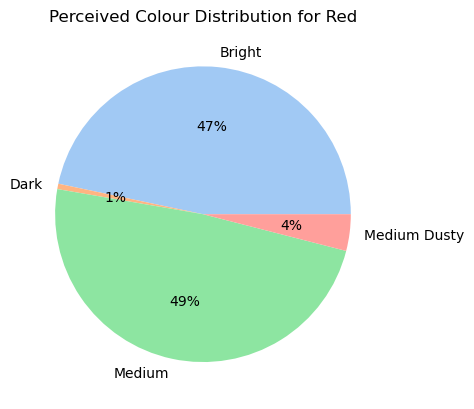

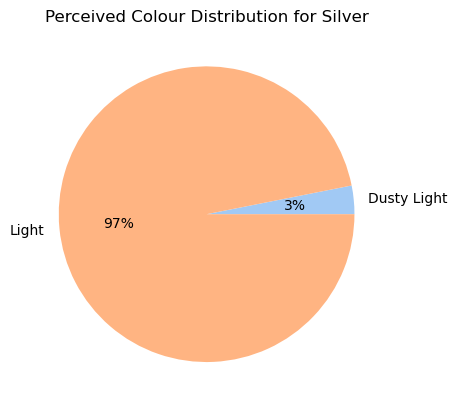

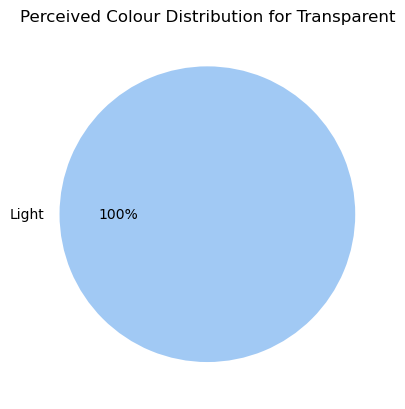

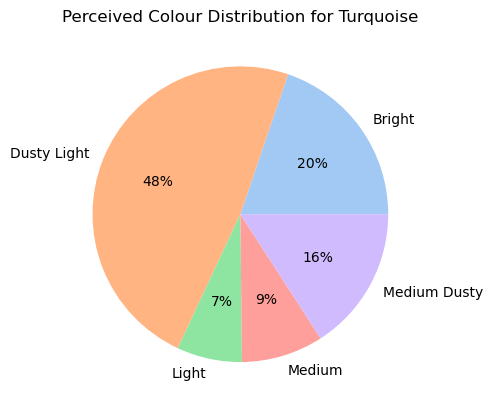

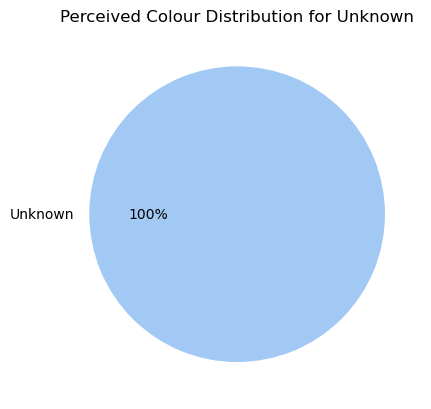

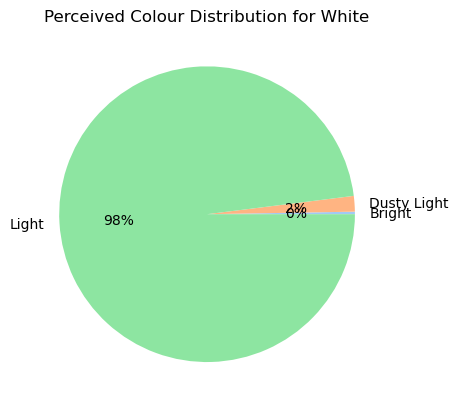

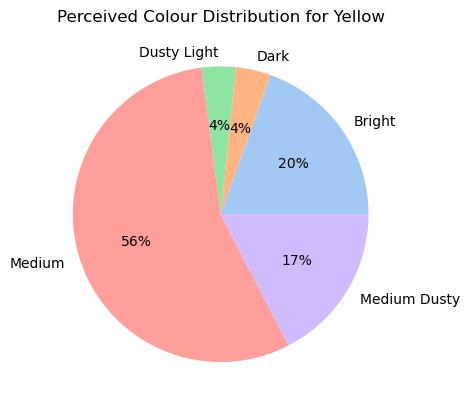

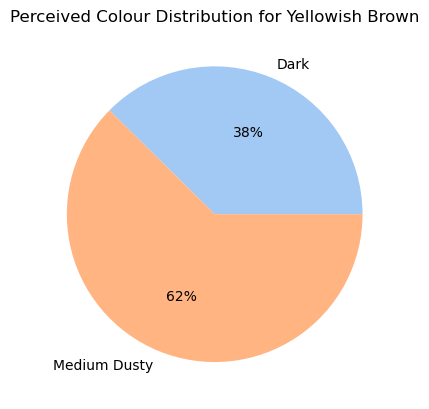

In [18]:
grouped = df_articles_filtered.groupby(['colour_group_name', 'perceived_colour_value_name']).size().reset_index(name='counts')


for name, group in grouped.groupby('colour_group_name'):

    plt.pie(group['counts'], labels=group['perceived_colour_value_name'], colors = colors, autopct='%.0f%%')
    plt.title(f"Perceived Colour Distribution for {name}")
    plt.show()

## Products

In [22]:
df_articles_filtered['product_type_name'].unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Hoodie',
       'Hair/alice band', 'Belt', 'Boots', 'Bikini top',
       'Swimwear bottom', 'Underwear bottom', 'Swimsuit', 'Skirt',
       'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top', 'Shorts',
       'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers', 'Sunglasses',
       'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer', 'Other shoe',
       'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Umbrella', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Dungarees', 'Outdoor trousers', 'Wallet', 'Swimwear 

In [21]:
df_articles_filtered['prod_name'].nunique()

45759

In [40]:
from collections import Counter
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nonobny/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
stop_words = set(stopwords.words('english'))
word_counts = Counter()

for description in df_articles_filtered['detail_desc']:
    description = str(description).lower()
    words = re.findall(r'\b\w+\b', description)
    words = [word for word in words if word not in stop_words]
    word_counts.update(words)

most_common_words = word_counts.most_common(50)
df_most_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

print(df_most_common_words)

            word  count
0           back  36750
1          front  36278
2           soft  35542
3          waist  34364
4         cotton  34262
5            top  30905
6         jersey  28490
7        sleeves  28390
8           long  26050
9            hem  25073
10       pockets  25036
11         cuffs  23644
12         short  20285
13   elasticated  19429
14        fabric  19041
15         lined  18216
16           zip  16464
17          side  15382
18          neck  14741
19         weave  14612
20       ribbing  13127
21          wide  13036
22      neckline  12793
23        button  12338
24        narrow  12189
25      shoulder  11972
26          knit  11875
27    adjustable  11623
28        collar  11522
29         dress  11115
30        pocket  11104
31        length  10494
32          legs  10468
33       buttons  10454
34     concealed  10243
35        around   9665
36       sleeved   9387
37           fly   9331
38         shirt   9309
39        straps   9253
40    drawstring